### The University of Melbourne, School of Computing and Information Systems

### COMP90049: Introduction to Machine Learning - 2025 - Semester 1

# Week 5 - Linear Regression and Logistic Regression

<div style="background-color: #E1BEE7; padding: 10px; border-radius: 5px;">
    
## Linear Regression 

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). The goal is to find the linear equation that best fits the data, which can be expressed as:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon $$

- **$y$**: Dependent variable (what you're trying to predict).
- **$x_1, x_2, \dots, x_n$**: Independent variables (features or predictors).
- **$\beta_0$**: Intercept (the value of $y$ when all $x$ values are 0).
- **$\beta_1, \beta_2, \dots, \beta_n$**: Coefficients (the change in $y$ for a one-unit change in each $x$).
- **$\epsilon$**: Error term (difference between the actual and predicted values).

In linear regression, the model tries to minimize the sum of squared differences between the actual and predicted values (also known as the residuals), resulting in the best-fit line. It's commonly used in predictive modeling and to understand the relationship between variables.

### Data Introduction
The Diabetes dataset is a well-known dataset in the field of machine learning and statistics, often used for regression tasks. It is included in the sklearn.datasets module of the scikit-learn library. This dataset contains medical data that is used to predict the progression of diabetes in patients after one year based on ten baseline variables.

Key Details:
- Samples: 442
- Features: 10 continuous variables, such as age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements.
- Target: A quantitative measure of disease progression one year after baseline.

In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

We have a dataset `X` containing several features (like age, BMI, blood pressure, etc.) and a target variable `y` that represents the progression of diabetes. 

Now, we can check these features one by one and model their correlation with the target label (Disease Progression). One famous feature is **Body Mass Index (BMI)**. We can use scatter plots to demonstrate the correlation between Diabetes progression and BMI.

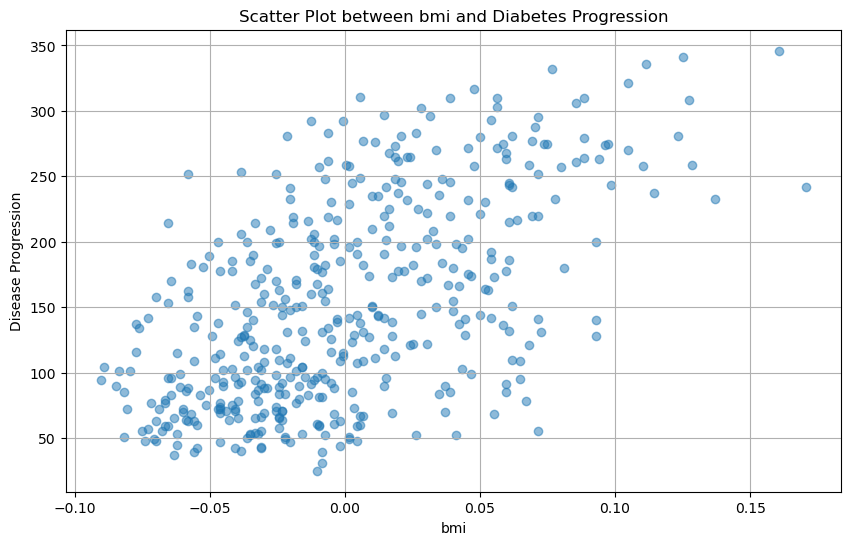

In [8]:

#  BMI (Body Mass Index) is often correlated with the progression of diabetes
feature = 'bmi'

# Create a scatter plot to visualize the relationship between the selected feature and diabetes progression
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(X[feature], y, alpha=0.5)  # Plot data points with some transparency (0.5) to handle overlapping points
plt.title(f'Scatter Plot between {feature} and Diabetes Progression')  # Set the plot title
plt.xlabel(feature)  # Label the x-axis with the selected feature name
plt.ylabel('Disease Progression')  # Label the y-axis with the target variable
plt.grid(True)  # Add grid lines to improve readability
plt.show()  # Display the plot

Using a Linear Regression Model we can model the correlation between these two matters. 

Mathematically, the model finds the best-fit equation: $y= \beta_0 + \beta_1 \times BMI$ where:

- $\beta_0$ is the intercept.

- $\beta_1$ is the coefficient that represents the impact of BMI on disease progression.



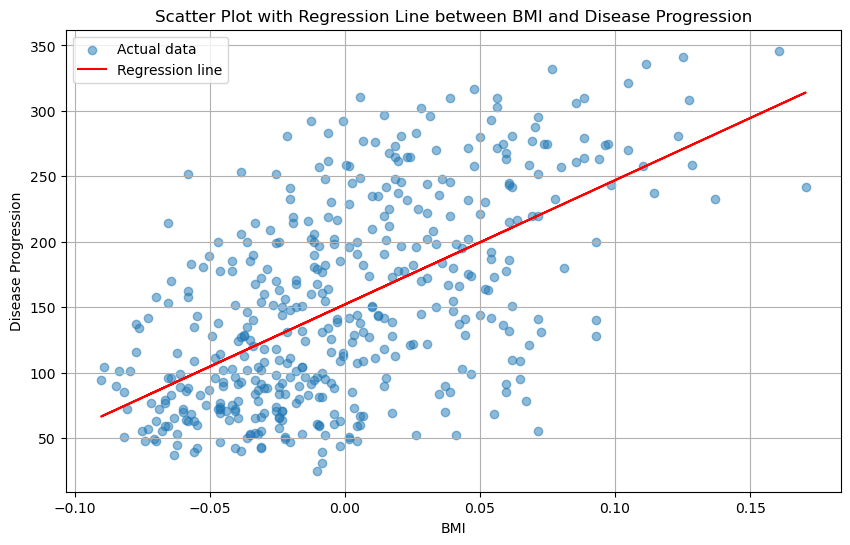

In [9]:
from sklearn.linear_model import LinearRegression

# Fit a Linear Regression model
model = LinearRegression()  # Initialize the linear regression model
model.fit(X[['bmi']], y)  # Train the model using BMI as the predictor and disease progression as the target

# Predict values using the trained regression model
y_pred = model.predict(X[['bmi']])  # Generate predicted values for BMI

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(X[['bmi']], y, alpha=0.5, label='Actual data')  # Scatter plot of actual data points
plt.plot(X[['bmi']], y_pred, color='red', label='Regression line')  # Plot the predicted regression line in red
plt.title('Scatter Plot with Regression Line between BMI and Disease Progression')  # Set the plot title
plt.xlabel('BMI')  # Label the x-axis
plt.ylabel('Disease Progression')  # Label the y-axis
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Add a legend to distinguish actual data and the regression line
plt.show()  # Display the plot


### **Regression Evaluation Metrics**
To evaluate if this model is successful in finding the correct pattern in our data, we use appropriate **evaluation metrics**. Some common evaluation metrics for regression models are:

 **1. Mean Squared Error (MSE)**
- Measures the **average squared difference** between actual and predicted values.
- Larger errors contribute disproportionately due to squaring, making MSE sensitive to outliers.
- Formula:
  $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
  where:
  - $y_i$ is the actual value,
  - $\hat{y}_i$ is the predicted value,
  - $n$ is the total number of samples.

 **2. Root Mean Squared Error (RMSE)**
- Represents the **square root of MSE**, providing an error measure in the same units as the target variable.
- RMSE is **more sensitive to large errors (outliers)** than MAE.
- Formula:
  $RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

 **3. Mean Absolute Error (MAE)**
- Provides the **average magnitude of errors** in the predictions, without considering their direction (positive or negative).
- It is more interpretable because it is in the **same units as the target variable**.
- Formula:
  $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$


**Choosing the Right Metric:**
- *If outliers are a concern*, RMSE is more sensitive and should be analyzed carefully.
- *If we want a more interpretable measure*, MAE is often preferred.
- *MSE is useful in optimisation tasks*, as it provides a continuous loss function for training models.


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


#Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict the target values for the test set
y_pred = model.predict(X_test)

# Step 5: Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 6: Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 2821.75
Root Mean Squared Error (RMSE): 53.12
Mean Absolute Error (MAE): 41.92


<div style="background-color: #E0F7FA; padding: 10px; border-radius: 5px;">
    
## Exercise 1
For the following instances build a Linear Regression model using Gradient Descent with respect to Mean Squared Error (MSE).
| x | y |
|---|---|
| 1 | 1 |
| 2 | 2 |
| 2 | 3 |


### Sample Answer

As covered in the lecture, for finding the optimum parameters for a loss function (such as MSE), we first need to calculate the partial derivatives of the loss function (MSE).

$MSE(\beta) = \mathcal{L}(\beta) = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 = \frac{1}{N} \sum_{i} (y_i - x_i^T \beta)^2$

The partial derivative of the MSE  loss function would be: $\frac{\partial \mathcal{L}}{\partial \beta_k} = -\frac{2}{N} \sum_{i} x_{ik} (y_i - x_i^T \beta_k)$

Then, use **Gradient Descent** method to find the $\beta$ that minimises the loss (MSE) in an iterative fashion.

$$
\beta_k^{j+1} = \beta_k^j + \Delta \beta_k^j, \quad \text{with} \quad \Delta \beta_k^j = - \eta  \frac{\partial \mathcal{L}}{\partial \beta_k^j}
$$

For Gradient Descent, we need to specify an initial estimate for the weights — here, we will use $\hat{y} = 0 + 0x$.  
Because MSE is **convex**, the choice of the initial estimate shouldn’t affect our overall answer.

We also need to choose the learning rate $\eta$ (*eta*); here we will say $\frac{\eta}{N} = 0.05$.

Skipping the workings, our update rule for each $\beta_k$ is based on the error of our prediction $\hat{y}$ for each instance $(y_i - \hat{y}_i)$:

$$
\beta_k^{(1)} = \beta_k + \frac{2\eta}{N} \sum_{i} x_{ik} (y_i - \hat{y}_i)
$$

Here, we have $3 (N)$ instances, and we are asked to begin with the line $\hat{y} = 0 + 0x$ (so $\beta = \langle 0,0 \rangle$).

<img src="images/itr1.png" width="300" style="display: block; margin: auto;">


A good place to begin is to calculate the errors for our instances (note that these would be squared if we were calculating MSE):

- For the first point, we predict $\hat{y}_1 = 0(1) + 0 = 0$, but we have $y_1 = 1$ (so the error is $+1$).
- For the second point, we predict $\hat{y}_2 = 0(2) + 0 = 0$, but we have $y_2 = 2$ (so the error is $+2$).
- For the third point, we predict $\hat{y}_3 = 0(2) + 0 = 0$, but we have $y_3 = 3$ (so the error is $+3$).

The **Mean Squared Error (MSE)** is calculated as: $MSE = \frac{1}{3} [(1 - 0)^2 + (2 - 0)^2 + (3 - 0)^2] = \frac{14}{3} \approx 4.67$


Our first update will look as follows:

$$
\beta_0^{(1)} = \beta_0 + \frac{2\eta}{N} \sum_{i} x_{i0} (y_i - \hat{y}_i) = 0 + 2(0.05) [(1)(1-0) + (1)(2-0) + (1)(3-0)] = 0.6
$$

$$
\beta_1^{(1)} = \beta_1 + \frac{2\eta}{N} \sum_{i} x_{i1} (y_i - \hat{y}_i) = 0 + 2(0.05) [(1)(1-0) + (2)(2-0) + (2)(3-0)] = 1.1
$$

So, our model has changed from $\hat{y} = 0 + 0x$ to the line $\hat{y} = 1.1x + 0.6$.

<img src="images/itr2.png" width="300" style="display: block; margin: auto;">

We can see that it is an improvement because the (squared) errors have reduced:

- For the first point, we predict $\hat{y}_1 = 1.1 \times 1 + 0.6 = 1.7$, but we have $y_1 = 1$ (so the error is $-0.7$).
- For the second point, we predict $\hat{y}_2 = 1.1 \times 2 + 0.6 = 2.8$, but we have $y_2 = 2$ (so the error is $-0.8$).
- For the third point, we predict $\hat{y}_3 = 1.1 \times 2 + 0.6 = 2.8$, but we have $y_3 = 3$ (so the error is $+0.2$).

The **Mean Squared Error (MSE)** is calculated as: $MSE = \frac{1}{3} [(-0.7)^2 + (-0.8)^2 + (0.2)^2] = \frac{0.49 + 0.64 + 0.04}{3} = \frac{1.17}{3} \approx 0.39$

We can see that the MSE has decreased after the first iteration of gradient descent.

**Note:** the sign matters in the gradient descent updates, even if it doesn’t when we calculate MSE. (This is an easy mistake to make!)

The second update proceeds the same way:

$$
\beta_0^{(2)} = \beta_0^{(1)} + \frac{2\eta}{N} \sum_{i} x_{i0} (y_i - \hat{y}_i) = 0.6 + 2(0.05) [(1)(1-1.7) + (1)(2-2.8) + (1)(3-2.8)] = 0.47
$$

$$
\beta_1^{(2)} = \beta_1^{(1)} + \frac{2\eta}{N} \sum_{i} x_{i1} (y_i - \hat{y}_i) = 1.1 + 2(0.05) [(1)(1-1.7) + (2)(2-2.8) + (2)(3-2.8)] = 0.91
$$

Our new line is $\hat{y} = 0.91x + 0.47$.


<img src="images/itr3.png" width="300" style="display: block; margin: auto;">

We can see that this new line has again improved the (squared) errors:

- For the first point, we predict $\hat{y}_1 = 0.91 \times 1 + 0.47 = 1.38$, but we have $y_1 = 1$ (so the error is $-0.38$).
- For the second point, we predict $\hat{y}_2 = 0.91 \times 2 + 0.47 = 2.29$, but we have $y_2 = 2$ (so the error is $-0.29$).
- For the third point, we predict $\hat{y}_3 = 0.91 \times 2 + 0.47 = 2.29$, but we have $y_3 = 3$ (so the error is $+0.71$).

Let’s do a few more updates, so we can see what’s happening with our weights:

$$
\beta_0^{(3)} = 0.47 + 2(0.05) [(1)(1-1.38) + (1)(2-2.29) + (1)(3-2.29)] = 0.474
$$

$$
\beta_1^{(3)} = 0.91 + 2(0.05) [(1)(1-1.38) + (2)(2-2.29) + (2)(3-2.29)] = 0.956
$$


<img src="images/itr4.png" width="300" style="display: block; margin: auto;">

$$
\beta_0^{(4)} = 0.474 + 2(0.05) [(1)(1 - 1.43) + (1)(2 - 2.386) + (1)(3 - 2.389)] \approx 0.454
$$

$$
\beta_1^{(4)} = 0.956 + 2(0.05) [(1)(1 - 1.43) + (2)(2 - 2.386) + (2)(3 - 2.389)] \approx 0.959
$$

<img src="images/itr5.png" width="300" style="display: block; margin: auto;">

$$
\beta_0^{(5)} = 0.454 + 2(0.05) [(1)(1 - 1.413) + (1)(2 - 2.372) + (1)(3 - 2.372)] \approx 0.438
$$

$$
\beta_1^{(5)} = 0.959 + 2(0.05) [(1)(1 - 1.413) + (2)(2 - 2.372) + (2)(3 - 2.372)] \approx 0.969
$$


<img src="images/itr6.png" width="300" style="display: block; margin: auto;">

After many iterations (almost 200 iterations), our line converges to $\hat{y} = 1.5 x - 0.5$.  
You can see that our initial choice was pretty poor, so we made some drastic changes to try to improve it;  
$\beta_0$ initially moved in the wrong direction, but it is (slowly) being corrected now.

You can see the pattern of changes for $\beta_0$ and $\beta_1$ in the following diagram.

<img src="images/Beta.png" width="800" style="display: block; margin: auto;">

This looks pretty slow; what if we use a **larger learning rate**  $\left(\frac{\eta}{N} = 0.1\right)$?

$$
\beta_0' = \beta_0 + \frac{2\eta}{N} \sum_{i} x_{i0} (y_i - \hat{y}_i) = 0 + 2(0.1) [(1)(1-0) + (1)(2-0) + (1)(3-0)] = 1.2
$$

$$
\beta_1' = \beta_1 + \frac{2\eta}{N} \sum_{i} x_{i1} (y_i - \hat{y}_i) = 0 + 2(0.1) [(1)(1-0) + (2)(2-0) + (2)(3-0)] = 2.2
$$

<img src="images/bigeta.png" width="300" style="display: block; margin: auto;">


Is this line ($\hat{y} = 2.2x + 1.2$) an improvement?

- For the first point, we predict $\hat{y}_1 = 2.2 \times 1 + 1.2 = 3.4$, but we have $y_1 = 1$ (so the error is $-2.4$).
- For the second point, we predict $\hat{y}_2 = 2.2 \times 2 + 1.2 = 5.6$, but we have $y_2 = 2$ (so the error is $-3.6$).
- For the third point, we predict $\hat{y}_3 = 2.2 \times 2 + 1.3 = 5.6$, but we have $y_3 = 3$ (so the error is $-2.6$).
The **Mean Squared Error (MSE)** is calculated as:

$$ MSE = \frac{1}{3} [(-2.4)^2 + (-3.6)^2 + (-2.6)^2] = \frac{5.76 + 12.96 + 6.76}{3} = \frac{25.48}{3} \approx 8.49 $$


By calculating the MSE, we realise that this is actually **worse** than our initial error (8.49 vs 4.67). It is clear that we have **increased our learning rate too much**, and we won’t achieve convergence.

The good news is that — since we are calculating the errors for all of the instances anyway, it isn’t too much extra work to “sanity check” that the MSE is actually decreasing.

- If we’re in the first few steps and MSE is increasing, then we can start again with a different initial guess and/or learning rate.
- After several iterations, if the decrease in the MSE becomes negligible, indicating that the gradient is nearly zero, we consider the algorithm to have converged; alternatively, if higher accuracy is desired, we can reduce the learning rate on our current estimate of β to further refine the solution.


<div style="background-color: #E1BEE7; padding: 10px; border-radius: 5px;">
    
## Logistic Regression 

Logistic Regression is a **supervised learning algorithm** used for **classification** tasks. It is mainly used when the output (target variable) is **binary**, meaning it can only take two values (e.g., Yes/No, Spam/Not Spam, Pass/Fail).

Unlike **Linear Regression**, which predicts continuous values, **Logistic Regression predicts probabilities** and then classifies the data based on a threshold (usually 0.5).

The term **"logistic"** comes from the **logistic (sigmoid) function**, which is used to convert any real number into a probability between **0 and 1**.

The **sigmoid function** is given by:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is the linear combination of input features.

The following plot shows the **sigmoid curve**, mapping values from any range to **(0,1)**.

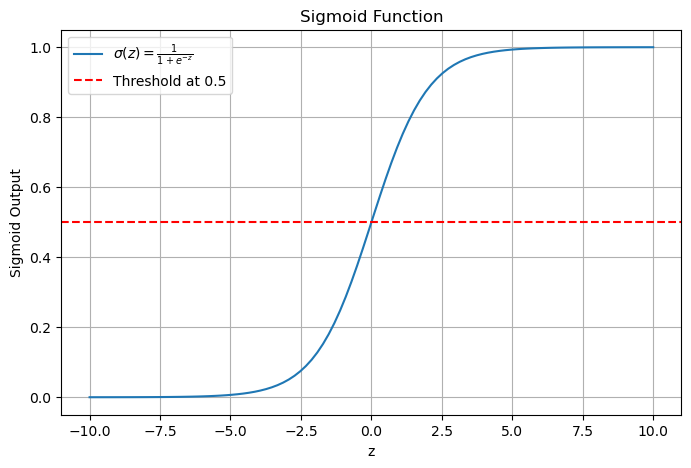

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(z, sigma_z, label=r'$\sigma(z) = \frac{1}{1+e^{-z}}$')
plt.axhline(0.5, color='red', linestyle='dashed', label='Threshold at 0.5')
plt.xlabel("z")
plt.ylabel("Sigmoid Output")
plt.title("Sigmoid Function")
plt.legend()
plt.grid()
plt.show()


In **Logistic Regression**, we are regressing (predicting) the **probability** that an input belongs to a certain class.

The **Logistic Regression model** is:

$$
P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:
- $P(Y=1 | X)$ is the **probability** of the data point being in **Class 1**.
- $X_1, X_2, ... X_n$ are the **input features**.
- $\beta_0, \beta_1, ... \beta_n$ are the **coefficients** learned from the data.


## Sample Dataset

In the following dataset, each instance represents a **news article**. The value of the features are **counts of selected words** in each article.  

 **Training Instances**

| ID  | Apple | IBM | Lemon | Sun | CLASS |
|----|------|----|------|----|-------|
| A  | 1    | 0  | 1    | 5  | 1 (FRUIT) |
| B  | 1    | 0  | 1    | 2  | 1 (FRUIT) |
| C  | 2    | 0  | 0    | 1  | 1 (FRUIT) |
| D  | 2    | 2  | 0    | 0  | 0 (COMPUTER) |
| E  | 1    | 2  | 1    | 7  | 0 (COMPUTER) |

 **Test Instances**
| ID  | Apple | IBM | Lemon | Sun | CLASS |
|----|------|----|------|----|-------|
| T  | 1    | 2  | 1    | 5  | 0 (COMPUTER) |

We already developed a **logistic regression classifier** to predict the class of the article and the weight of the **4 features** (and the bias $\beta_0$) are as follows:

$$
\hat{\beta} = [\beta_0, \beta_1, \beta_2, \beta_3, \beta_4] = [0.2, 0.3, -2.2, 3.3, -0.2]
$$




<div style="background-color: #E0F7FA; padding: 10px; border-radius: 5px;">
    
## Exercise 2

Explain the intuition behind the model parameters in relation to the features.

### Sample Answer
In this dataset, we want to identify if a piece of writing is about **computer** or **fruit** (e.g., *"new apple iPhone is very expensive"* vs. *"an apple a day, keeps the doctor away"*).  
To do so, we are using **4 terms** (*apple, ibm, lemon, sun*) and the count of their occurrences in a piece of writing.  For example, we know that **Doc A** includes `apple` once** and `Sun` five times.

Based on the definition, we know that in **Logistic Regression**,  we model **$P(y = 1 | x_1, x_2, ..., x_F )$** directly as subject to parameter **$\beta$**, using the following equation:

$$
P(y=1 | x_1, x_2, …, x_F) = \frac{1}{1+e^{-(\beta_0+\beta_1 x_1+⋯+\beta_F x_F)}} = \sigma(\beta_0+\beta_1 x_1+⋯+\beta_F x_F)
$$

Here, we have a binary output label $y = \{0 (Computer), 1 (Fruit)\}$, and four features: *apple, ibm, lemon, sun*.

The weights $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$  ($=[0.2, 0.3, -2.2, 3.3, -0.2]$) denote the respective **importance of the features** for predicting the class *Fruit (1)*. For example $\beta_2 (-2.2)$ Indicates how important feature *IBM* is for predicting $y = 1$ (fruit). $\beta_0 (0.2)$ Represents the *bias* for this model.

The **negative sign** indicates that the occurrence of the word *IBM* is **negatively correlated** with the class *FRUIT*. If we observe *IBM* in a document, it makes the label *FRUIT* **less likely**.

The **positive value of** $\beta_3$ **indicates a positive correlation** of the word *lemon* with *FRUIT*. If the word *lemon* is mentioned in a document, it **increases the probability** of its label being *FRUIT*.


<div style="background-color: #E0F7FA; padding: 10px; border-radius: 5px;">
    
## Exercise 3

Using this model, predict the label for the test instance.

### Sample Answer

Using the logistic regression formula above, we find

$$
P(fruit│T)=P(\hat{y}=1│T)= \sigma(\beta_0+\beta_1 t_1+⋯+\beta_4 t_4 ) = \sigma(0.2 + 0.3\times1 +(-2.2)\times2 + 3.3\times1 +(-0.2)\times5) = \sigma(-1.6) = \frac{1}{1+e^{-(-1.6)}} = 0.17
$$

And consequently

$$
P(computer│T)=1- P(fruit│T)=1-0.17=0.83
$$

Recall that we turn the logistic regression model into a classifier by predicting label **y = 1** whenever **p(y=1|x, θ ) > 0.5**, and predict **y = 0** otherwise.

Since for the test instance **T** the probability **p(y=1) (FRUIT)** is smaller than **0.5**, we predict label **y=0 (COMPUTER)** for **T**. Comparing with our **"ground truth"** that we have in our dataset, we can see that our prediction is correct. 🙂


<div style="background-color: #E0F7FA; padding: 10px; border-radius: 5px;">
    
## Exercise 4
For this Logistic Regression model, compute a single gradient descent update for parameter $\beta_1$ given the training instances provided above.

Recall that for each feature $j$, we compute its weight update using the formula:

$$
\beta_j \leftarrow \beta_j - \eta \sum_{i} \left( \sigma(x_i; \beta) - y_i \right) x_{ij}
$$

Summing over all training instances $i$. 

Compute the update for $\beta_1$, assuming the current parameters as specified above, and a learning rate of $\eta = 0.1$.


### Sample Answer
$\beta_1$ is the model parameter (respective importance) of the feature 1 (apple) in our model.  Using the Gradient Descent method over iterations, we want to find the best parameters of the model  (the parameters that minimise the loss (error) of our model).

 **Step 1:** Compute $\sigma(x_i; \beta)$ for all training instances
$$
\sigma(x_A; \beta) = \sigma(0.2+(0.3\times1+(-2.2)\times0+3.3\times1+(-0.2)\times5))=0.94
$$
$$
\sigma(x_B; \beta) = \sigma(0.2+(0.3\times1+(-2.2)\times0+3.3\times1+(-0.2)\times2))=0.97
$$
$$
\sigma(x_C; \beta) = \sigma(0.2+(0.3\times2+(-2.2)\times0+3.3\times0+(-0.2)\times1))=0.65
$$
$$
\sigma(x_D; \beta) = \sigma(0.2+(0.3\times2+(-2.2)\times2+3.3\times0+(-0.2)\times0))=0.03
$$
$$
\sigma(x_E; \beta) = \sigma(0.2+(0.3\times1+(-2.2)\times2+3.3\times1+(-0.2)\times7))=0.12
$$

**Step 2:** Compute the parameter update for $\beta_1$
We use the following formula:

$$
\beta_1 = \beta_1 - \eta \sum_{i \in \{A,B,C,D,E\}} (\sigma(x_i; \beta) - y_i) x_{1i}
$$

$$
\beta_1 = 0.3 - 0.1 \sum_{i \in \{A,B,C,D,E\}} (\sigma(x_i; \beta) - y_i) x_{1i}
$$

$$
\beta_1 = 0.3 - 0.1 [((\sigma(x_A; \beta) - y_A) x_{1A}) + ((\sigma(x_B; \beta) - y_B) x_{1B}) + ((\sigma(x_C; \beta) - y_C) x_{1C}) + ((\sigma(x_D; \beta) - y_D) x_{1D}) + ((\sigma(x_E; \beta) - y_E) x_{1E})]$$

Substituting the computed values:

$$
\beta_1 = 0.3 - 0.1 [((0.94 - 1) \times 1) + ((0.97 - 1) \times 1) + ((0.65 - 1) \times 2) + ((0.03 - 0) \times 2) + ((0.12 - 0) \times 1)]
$$

$$
= 0.3 - 0.1 [(-0.06) + (-0.03) + (-0.70) + 0.06 + 0.12]
$$

$$
= 0.3 - 0.1 (-0.61)
$$

$$
= 0.3 + 0.061 = 0.361
$$

The new value for $\beta_1$ is **0.361**.  
Given the feedback from the current model mistakes (over our training data), the **importance of feature Apple has slightly increased**.  
We can do the same thing for the other parameters **$\beta_2, \beta_3, \beta_4$**.  We continue iterating until we find the “optimum” parameters.

**Note:** In the full Gradient Descent algorithm, we first compute the sigma value for all parameters (Step 1 above), and then we update **all parameters at once** (Step 2 above).


## Coding Example
Using the same dataset, we are creating a Logistic Regression model using the `LogisticRegression` from the `sklearn` library.

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Training Data
train_data = pd.DataFrame({
    'Apple': [1, 1, 2, 2, 1],
    'IBM': [0, 0, 0, 2, 2],
    'Lemon': [1, 1, 0, 0, 1],
    'Sun': [5, 2, 1, 0, 7],
    'CLASS': [1, 1, 1, 0, 0]
})

# Test Data
test_data = pd.DataFrame({
    'Apple': [1],
    'IBM': [2],
    'Lemon': [1],
    'Sun': [5],
})

# Splitting features and labels
X_train = train_data.drop(columns=['CLASS'])
y_train = train_data['CLASS']

X_test = test_data

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting the class for the test instance
y_pred = model.predict(X_test_scaled)

# Formatting output
prediction_label = "FRUIT" if y_pred[0] == 1 else "COMPUTER"

# Displaying result
print(f"Predicted Class for Test Instance (T): {prediction_label}")


Predicted Class for Test Instance (T): COMPUTER


<div style="background-color: #FFE4B5; padding: 10px; border-radius: 5px;">
    
### Challenge Question:
Why do we need to scale the dataset before training the model? What will happen if we don't perform scaling?

### Sample Answer

Scaling is important in logistic regression (and many other machine learning models) for the following reasons:

1. **Improves Model Performance** Logistic regression uses gradient-based optimisation (e.i., Gradient Descent) to find the optimal weights. When features have different scales (e.g., `Sun` values range from 0 to 7 while `IBM` is just 0 or 2), the optimisation can become inefficient or converge slowly.
2. **Prevents Certain Features from Dominating** In this dataset, the `Sun` feature ranges from 0 to 7, while others like `IBM` only take values from {0, 2}. Without scaling, the model might assign too much importance to `Sun` just because of its larger values, even if it's not the most important predictor.
3. **Better Numerical Stability** Logistic regression calculates logits (linear combination of features and weights), which are then passed through the sigmoid function. If the feature values are too large, it can lead to numerical instability (e.g., extremely large or small values in exponentiation).